# Part I - (Dataset Exploration Title)
## by (Alfred BobManuel)

## Introduction
This is a PISA dataset introduced by [Udacity](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) for the final project testing phase, the dataset contains 113,937 rows and 81 columns that depict issued loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income etc. this data will be analyzed visually to generate insight to answer these questions.
 
- What affects the borrower’s APR or interest rate?
- Are there differences based on how large the original amount issued as loan is? 
- What are the factors that affect a loan’s outcome status?

#### **What is Prosper Loan?**
Prosper loans is a peer-to-peer lending platform that provides personal loans to borrowers with fair or good credit. To qualify applicants, the company uses a proprietary rating system that considers data points like credit history and debt-to-income ratio. Borrowers are then assigned a Prosper score, which investors use to decide whether to fund your loan. [source](https://www.nerdwallet.com/reviews/loans/personal-loans/prosper-personal-loans), To understand more about the column titles you can visit the [google sheet](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).



## Preliminary Wrangling

In [178]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [179]:
# Load Dataset
prosper = pd.read_csv('prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?
This data set contains 113,937 rows and 81 columns, including ProsperRating (Alpha) , borrower rate (or interest rate), current loan status,loan amount, borrower income etc.

### What is/are the main feature(s) of interest in your dataset?

> There are many features to work with such as the BorrowerAPr, ProsperScore, CreditScore, Original Loan Aount, Monthly Payment, Borrower Occupation, Borrower State and others, although i selected a few which i felt are neccessary for my visualization and analysis as these features would help in decision making.

> the important Features i will look at are as follows:

- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or * lowest risk score. Applicable for loans originated after July 2009.
- LoanOriginationDate: The date the loan was originated.
- LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

> Although from my findings so far my main feature of interest is the BorrowerApr, this is because the BorrowerApr would enable me predict the best feauters the borrowers annual rate for the loan issued.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that EmploymentStatus and StatedMonthly income will play a vital role in the amount of loan given and the Term given to the borrowers, and i also think that loan status will also have an impact on loan, there are so many interest columns that will help my investigation as i carry on my analysis so it wont come as a surprise that while running my analysis i might pick up some new variables of interest.



In [21]:
# high-level overview of data shape and composition
print(prosper.shape)
print(prosper.head(5))

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18

This data set has a total of 113937 rows and 81 columns

I would like to start with identifying my variables and listing them out ass a table in order to know how to address my question, to do this i will look at the shape of my dataframe and understand its various entries by using the info method. 
**Note: this will be done for the columns i have choosen to work with.** 

In [53]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Variables 

|Index||Variable||Data Type|
|---||----||----|
|1||Term||Continuous|
|2||ListingCreationDate||Discrete|
|3||ClosedDate||Discrete|
|4||BorrowerAPR||Continuous|
|5||BorrowerRate||Continuous|
|6||LenderYield||Continuous|
|7||ProsperRating (Alpha)||Ordinal|
|8||ProsperScore||Ordinal|
|9||IncomeRange||Continuous|
|10||ListingCategory (numeric)||Ordinal|
|11||BorrowerState||Continuous|
|12||Occupation||Nominal|
|13||StatedMonthlyIncome||Continuous|
|14||LoanCurrentDaysDelinquent||Continuous|
|15||EmploymentStatus||Ordinal|
|16||AmountDelinquent||Continuous|
|17||LoanOriginalAmount||Discrete|
|18||LoanOriginationDate||Discrete|
|19||MonthlyLoanPayment||Continuous|
|20||LP_ServiceFees||Continuous|
|21||Investors||Ordinal|
|22||LoanStatus||Ordinal|


The table above represents the classification of data types in the dataset i.e, Qualitative and Quantitative, According to my  observation of the dataset.


In [32]:
prosper.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

the above output displays the missing values of this dataset here we can clearly see that the data entry for the Credit Grade has 84984 missing values. 

In [3]:
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
pd.crosstab(prosper['BorrowerAPR'], prosper['Term'], margins = True)

Term,12,36,60,All
BorrowerAPR,,,,
0.00653,0,2,0,2
0.00864,0,1,0,1
0.01315,0,2,0,2
0.01325,0,1,0,1
0.01548,0,1,0,1
...,...,...,...,...
0.46201,0,1,0,1
0.48873,0,1,0,1
0.50633,0,1,0,1


#### Although this isnt a data wrangling project i will still take out some time to structure my dataset for a proper analysis 

### Copy dataset

In [164]:
new_prosper= prosper.copy()

In [165]:
new_prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


I copied the dataset to make sure changes i make dont affect the main dataset incase i make some mistakes or drop columns i might want to reuse.

In [180]:
new_loan = new_prosper.loc [:,['Term','ListingCreationDate','ClosedDate','BorrowerAPR','BorrowerRate','LenderYield',
                               'ProsperRating (Alpha)','ProsperScore','IncomeRange','ListingCategory (numeric)','BorrowerState','Occupation',
                               'EmploymentStatus','AmountDelinquent','StatedMonthlyIncome','LoanCurrentDaysDelinquent',
                               'LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment','LP_ServiceFees','Investors','LoanStatus', 'IsBorrowerHomeowner','ProsperRating (numeric)']].copy()
new_loan.head()

,Term,ListingCreationDate,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,IncomeRange,ListingCategory (numeric),...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,LoanStatus,IsBorrowerHomeowner,ProsperRating (numeric)
0,36,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,"$25,000-49,999",0,...,3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258,Completed,True,NaN
1,36,2014-02-27 08:28:07.900000000,NaN,0.12016,0.0920,0.0820,A,7.0,"$50,000-74,999",2,...,6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1,Current,False,6.0
2,36,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,Not displayed,0,...,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41,Completed,False,NaN
3,36,2012-10-22 11:02:35.010000000,NaN,0.12528,0.0974,0.0874,A,9.0,"$25,000-49,999",16,...,2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158,Current,True,6.0
4,36,2013-09-14 18:38:39.097000000,NaN,0.24614,0.2085,0.1985,D,4.0,"$100,000+",2,...,9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20,Current,True,3.0


There are two ways i could have done this 

In [167]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   ClosedDate                 55089 non-null   object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   IncomeRange                113937 non-null  object 
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

In [19]:
new_loan.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Length: 113937, dtype: bool

There are no duplicates in this dataset.

In [21]:
new_loan.isnull().sum()

Term                             0
ListingCreationDate              0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
IncomeRange                      0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64

In [108]:
new_loan.dropna(inplace = True)
new_loan.shape

(25992, 22)

In [24]:
new_loan.ClosedDate

0         2009-08-14 00:00:00
1                         NaN
2         2009-12-17 00:00:00
3                         NaN
4                         NaN
                 ...         
113932                    NaN
113933                    NaN
113934                    NaN
113935    2013-08-13 00:00:00
113936                    NaN
Name: ClosedDate, Length: 113937, dtype: object

In [34]:
# Change the Date columns from object to datetime
new_loan['ListingCreationDate'] = new_loan[['ListingCreationDate']].apply(pd.to_datetime, errors='coerce')
new_loan['ClosedDate'] = new_loan[['ClosedDate']].apply(pd.to_datetime, errors='coerce')
new_loan['LoanOriginationDate '] = new_loan[['LoanOriginationDate']].apply(pd.to_datetime, errors='coerce')


In [ ]:
# convert the data types to categorical
new_loan[['Occupation', ' BorrowerState', 'EmploymentStatus','LoanStatus',
          'ListingCategory (numeric)']].apply(lambda x: x.astype('category'))


In [50]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       113937 non-null  int64         
 1   ListingCreationDate        113937 non-null  datetime64[ns]
 2   ClosedDate                 55089 non-null   datetime64[ns]
 3   BorrowerAPR                113912 non-null  float64       
 4   BorrowerRate               113937 non-null  float64       
 5   LenderYield                113937 non-null  float64       
 6   ProsperRating (Alpha)      84853 non-null   object        
 7   ProsperScore               84853 non-null   float64       
 8   IncomeRange                113937 non-null  object        
 9   ListingCategory (numeric)  113937 non-null  int64         
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  object  

## Univariate Exploration

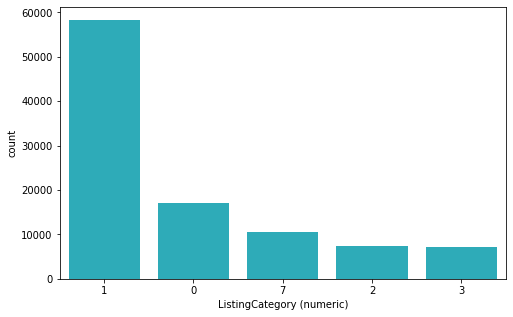

In [38]:
plt.figure(figsize =[8,5])
list_category = new_loan['ListingCategory (numeric)'].value_counts()[:5]
feature  = list_category.index
base_color = sb.color_palette()[9]
sb.countplot(data = new_loan, x = 'ListingCategory (numeric)', order = feature, color = base_color)

**Insight**
- Above is just a simple plot that i used to categorized the ListingCategory, since there are many other categories i just displayed a few and they are debt consolidation as 1, Home improvement as 2, business and 3 and 7 and other you can see the [Google sheets](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) for better understanding.
- As we see above majority of the people have taken the loan for debt consolidation.

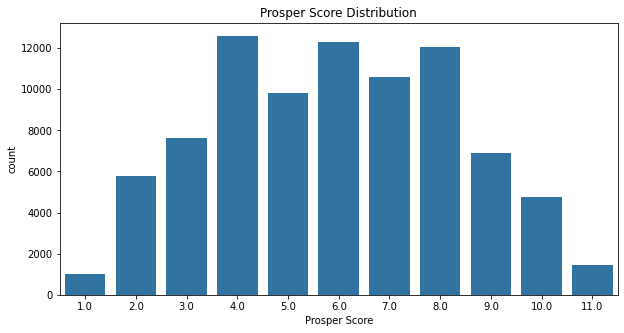

In [61]:
#Prosper Score Distribution range
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=new_loan, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

**Insight** 
- According to the google sheet description of the prosper score it sets a risk score range from 1-10, and with the above visual its slightly normal distributed but 4, 6 and 8 appear to be the most frequent amongst the range of values

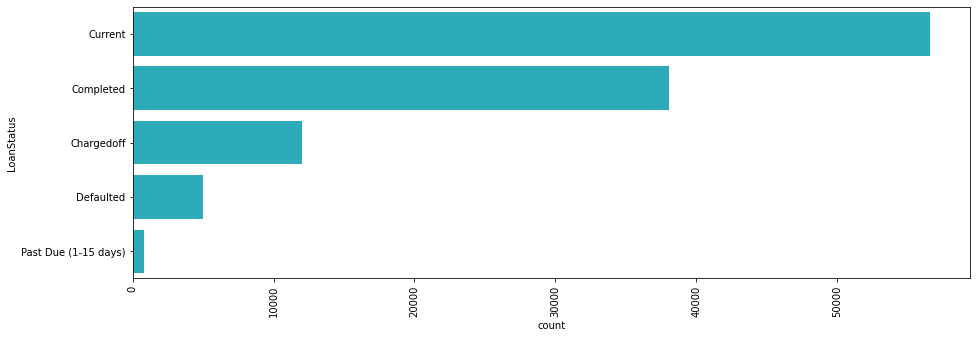

In [59]:
# COunt of LoanStatus

list_category = new_loan['LoanStatus'].value_counts()[:5]
feature  = list_category.index

plt.figure(figsize=[15,5])
#plt.subplot(2,1,1)
sb.countplot(data = new_loan, y = "LoanStatus", order=feature, color= base_color)
plt.xticks(rotation = 90);


**Insight**
- This is fairly easy to grab, this dataset counts a high number of people with current loan and also completed loan payment with very few persons whose date of payment is over due, we could actually determine the exact number of persons but since this is a visualization project i wouldnt go into all the details.

In [56]:
# lets look at the percentage of people with various occupation in this dataset
occpt_list = new_loan["Occupation"].value_counts()[:5]
occpt_index = occpt_list.index

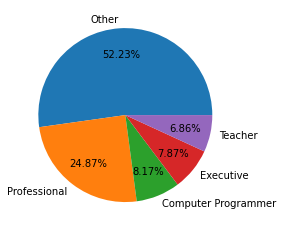

In [57]:
plt.pie(occpt_list, labels= occpt_index,pctdistance= 0.7 , autopct = "%.2f%%");

**insight**
- it appears that people categorized under the term ``Other`` seem to have the highest value count.

In [60]:
# Find out the count of the employment status of customers who were granted loan 
loan_count = new_loan['EmploymentStatus'].value_counts().rename_axis('sub_employment_values').reset_index(name = 'counts')
loan_count.head(7)

,sub_employment_values,counts
0,Employed,67322
1,Full-time,26355
2,Self-employed,6134
3,Not available,5347
4,Other,3806
5,Part-time,1088
6,Not employed,835


In [61]:
total_of_counts = loan_count.counts.sum()
total_of_counts

111682

In [62]:
# Add numbers along with the percentage 
def autopct_format(percent_value):
    print(percent_value)
    return'{:.1f}%\n{:.0f}'.format(percent_value, total_of_counts*percent_value/100)

In [63]:
# set labels and values
first_label = loan_count.sub_employment_values
label_values = loan_count.counts
explode = [0.1,0,0,0,0,0,0,0]

60.280078649520874
23.59825223684311
5.492380261421204
4.7877006232738495
3.407890349626541
0.9741946123540401
0.7476585451513529
0.7118425332009792


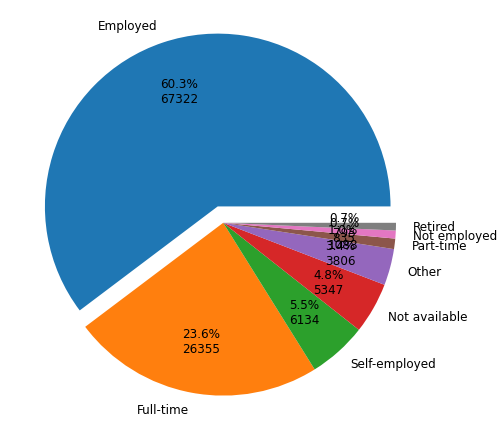

In [68]:
# Visualize the count with a pie chart 

fig = plt.figure(figsize=[6,6])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(label_values, labels = first_label, autopct = autopct_format, pctdistance= 0.7, explode = explode, textprops = {'fontsize': 12});
plt.show();

**Insight**
- the piechart enabled me to understand the count of the Employement Status of the applicants,Hmm it seems that people who are employed appear the most in this dataset having 60% in this dataset, it makes me wonder why employed persons will seek loan this most, is this as a result of higher living standards? well thats a story for another time.

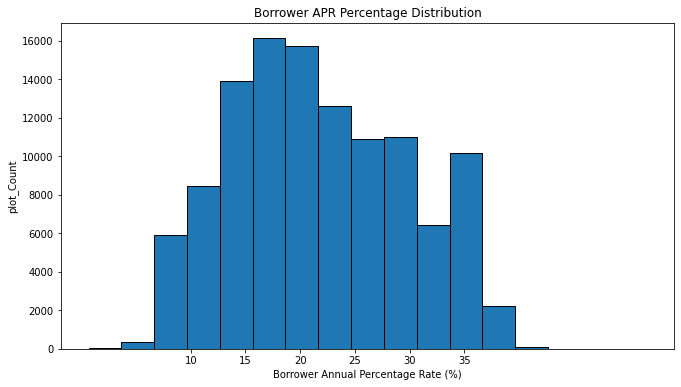

In [27]:
# Borrowe Apr percentage Distribution
borrower_APR_percentage = new_loan['BorrowerAPR']*100
bins = np.arange(new_loan['BorrowerAPR'].min()*100, new_loan['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[11, 6])
plt.hist(x = borrower_APR_percentage, bins = bins, edgecolor = 'black')
plt.title('Borrower APR Percentage Distribution')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('plot_Count')
plt.xticks([10,15,20,25,30, 35], ['10', '15', '20', '25', '30', '35'])
plt.show()

**Insight**

- The BAPR appears to be normally distributed between 15 and 20, and 30, 35 inclusive.

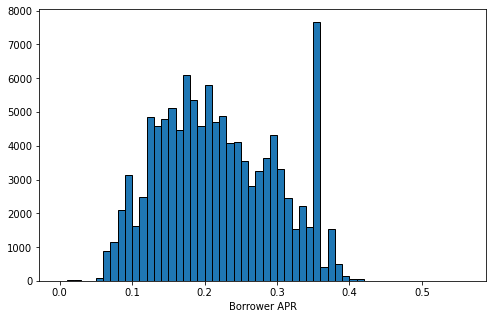

In [67]:
# To further understand the distribution of BorrowerApr
bins = np.arange(0, new_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = new_loan, x = 'BorrowerAPR', bins = bins, edgecolor = 'black');
plt.xlabel('Borrower APR');

**Insight**

- Ok between 0.35 and 0.36 there is to be a very high peak, small peaks can be seen at 0.1 and 0.32 and they also share equal peak, this plot also has several modes of maxima from 0.0 through 0.43. With this i would like to see the values that are greater than 0.43 because its very obvious that just a very few values fall within that range.

In [72]:
new_loan['BorrowerAPR'][new_loan['BorrowerAPR']>= 0.43].value_counts()

0.45857    2
0.46201    1
0.51229    1
0.50633    1
0.48873    1
Name: BorrowerAPR, dtype: int64

There we go we have 6 people who were granted small amount of loans which shows from the plot above the very small range of values that exist within that peak but i think i would like to look at this with the describe method to understand why they are just 6

In [77]:
# Select columns that will enable me see exactly who falls under the category of 0.43
feature = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
subset = new_loan[feature]

# To check the loans with BorrowerAPR less than 0.43
subset[subset.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
18326,3000,0.45857,10000.000000,36,NaN,NaN
22195,1789,0.46201,2916.666667,36,NaN,NaN
36018,1500,0.51229,2838.000000,36,NaN,NaN
56761,3000,0.50633,0.000000,36,NaN,NaN
82043,3000,0.48873,1583.333333,36,NaN,NaN
103973,2800,0.45857,3750.000000,36,NaN,NaN


OK now i am satisfied its appears that the 6 persons who received the small loan of amount ranging from ``3000 to 1500``, have no employment status or ProsperRating Alpha, and also a low statedmonthly income, so the idea is to play safe and grant these individuals a small loan so that the can meet up the payment. Quite understandable.

In [22]:
new_loan['ProsperRating (Alpha)'].value_counts().index
# new_loan.info()

CategoricalIndex(['C', 'B', 'A', 'D', 'E', 'HR', 'AA'], categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True, dtype='category')

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

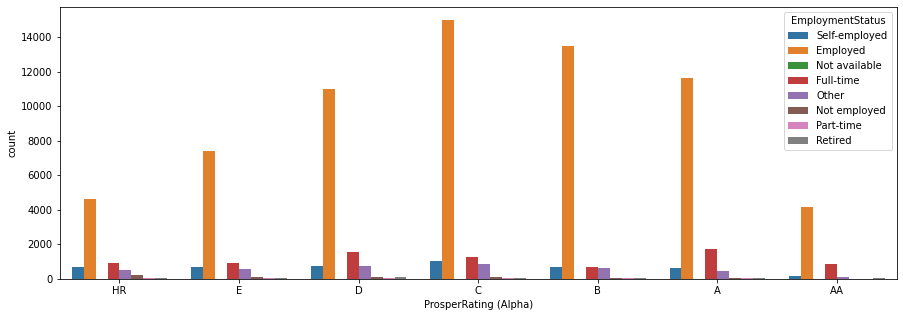

In [11]:
# using subplots
plt.figure(figsize = [15, 5])
# plt.subplot(1,2,1)

# Converting PropserRating to a categorical data type with a specific order for the plot
ordered_rating = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ordered_rating)
new_loan['ProsperRating (Alpha)'] = new_loan['ProsperRating (Alpha)'].astype(ordered_var)

sb.countplot(x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', data = new_loan)

**Insight**
- the above plot clearly shows that lower ratings are associated with the sample population that fall under the categories of the following employment status ``Not employed, Self employed, Retired and Part time.`` i think this also explains why the small range of values in my previous plot fell under the category of people who didnt have certain details. The ratings are mostly categorized.



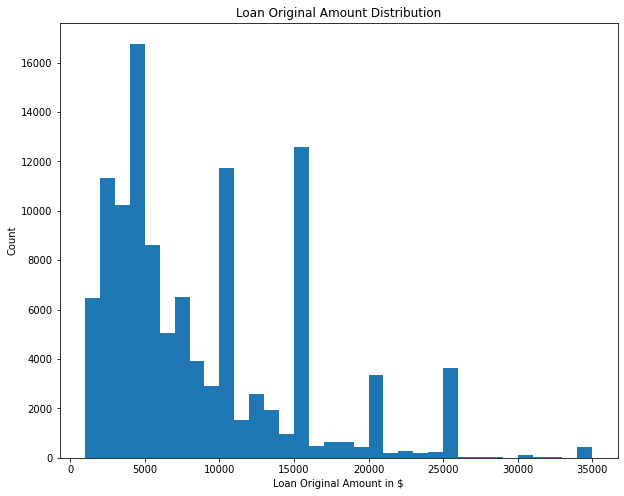

In [69]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(new_loan['LoanOriginalAmount'].min(), new_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = new_loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

- i wouldnt call this my insight because in as much as the plot is skewed to the right it is long tailed so i would plot it on a log scale. 

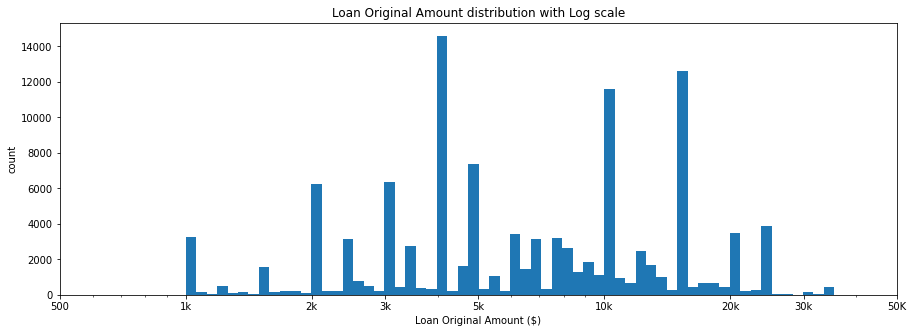

In [14]:
# Putting Loan Original Amount on a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(new_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = new_loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

**Insight**
- Now this i can generate my insight from, the highest value is between 3k and 5k, that should roughly be a ``4.`` and there is also a pick between 10k and 20k.

In [86]:
# Using a function to carry out the countplot
loan_ft = ['EmploymentStatus', 'ProsperRating (Alpha)', 'ProsperScore','ListingCategory (numeric)',
           'Occupation', 'ListingCreationDate', 'LoanOriginalAmount', 'Investors', 'LoanStatus']

In [87]:
list(enumerate(loan_ft)) #To return the list of columns and there corresponding index

[(0, 'EmploymentStatus'),
 (1, 'ProsperRating (Alpha)'),
 (2, 'ProsperScore'),
 (3, 'ListingCategory (numeric)'),
 (4, 'Occupation'),
 (5, 'ListingCreationDate'),
 (6, 'LoanOriginalAmount'),
 (7, 'Investors'),
 (8, 'LoanStatus')]

In [ ]:
# iterating through the columns to create count plot 
for i in enumerate(loan_ft):
    plt.subplot(6,3,i[0]+1)
    sb.countplot(i[1], hue ='LoanStatus', data = new_loan)
    

In [10]:
# Checking the values of the column Term.
new_loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

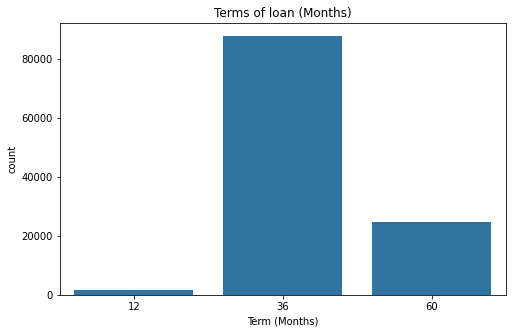

In [15]:
# create the frequency distribution of the Term (variable)
plt.figure(figsize = [8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=new_loan,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

**Insight**
- Tht Term column is term of loans expressed in months and from the first code ``(value_counts)`` we can see that the columns are expressed as such 1year = 12months, 3years = 36months, 5years = 60months, according to the plot we can see that most of the values are reflected in 36months, this is especially the case when the amount of money loaned is large, as the interest compounds over time.

In [83]:
sb.color_palette()[9]

(0.39215686274509803, 0.7098039215686275, 0.803921568627451)

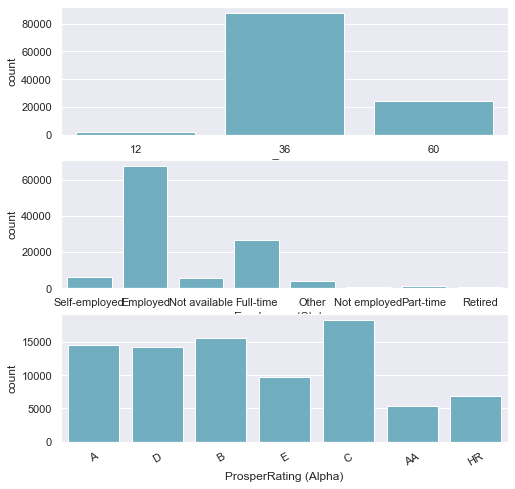

In [85]:
# Plotting the three variables to understand the ordinal variable distribution

fig, ax = plt.subplots(nrows = 3, figsize = [8,8])
sb_color = sb.color_palette()[9]
sb.countplot(x = 'Term', data = new_loan, color = sb_color, ax = ax[0])
sb.countplot(x = 'EmploymentStatus', data = new_loan, color = sb_color, ax = ax[1])
sb.countplot(x = 'ProsperRating (Alpha)', data = new_loan, color = sb_color, ax = ax[2]);
plt.xticks(rotation = 30);

**Insight**
- This plot is self explanatory, the term of the loan is mostly 36 months and the most of the borrowers are employed and full time, also people with high ProsperRatings fall within D and C

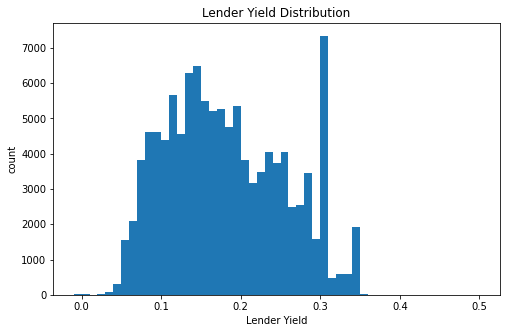

In [71]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(new_loan['LenderYield'].min(), new_loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_loan, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count');

**Insight**
- there is a peak in 0.3 although this plot is normally distributed, its high values fall within 0.1 and 0.2

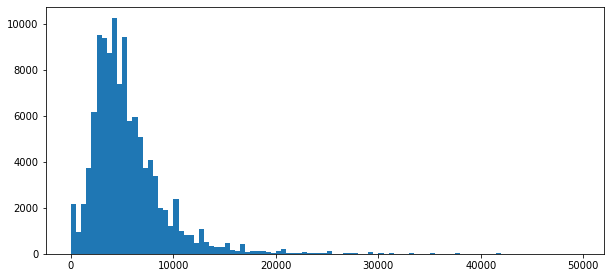

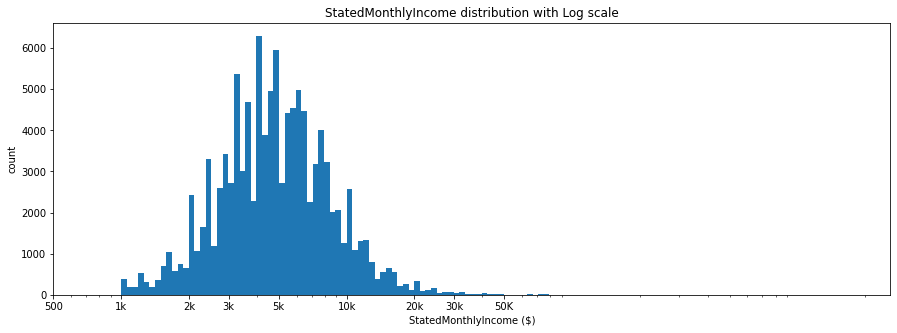

In [74]:
# Distribution of stated monthly income
plt.figure(figsize = [10,10])
plt.subplot(2,1,2)
bins_size = np.arange(0, 50000, 500)
plt.hist(data = new_loan, x = 'StatedMonthlyIncome', bins=bins_size);


# Putting Loan Original Amount on a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(new_loan['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = new_loan, x = 'StatedMonthlyIncome', bins = bins)
plt.title('StatedMonthlyIncome distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('count')
plt.show()

**Insight**

- althought the distribution of the stated monthly income is severly right skewed as show in the first plot wiht most of the stated monthly income less than 30k, with a log scale i can now see that the highest salary income is withinm the range of 3-5k

In [81]:
new_loan['AmountDelinquent'].max()

463881.0

In [83]:
new_loan['AmountDelinquent'].min()

0.0

In [82]:
new_loan['AmountDelinquent'].value_counts()

0.0        89818
50.0          73
100.0         67
25.0          66
30.0          65
           ...  
14910.0        1
1280.0         1
13180.0        1
2023.0         1
5062.0         1
Name: AmountDelinquent, Length: 7059, dtype: int64

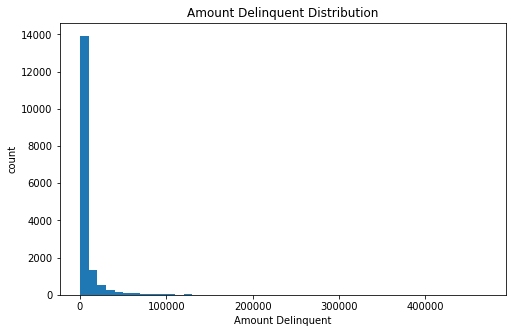

In [78]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(new_loan['AmountDelinquent'].min(), new_loan['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_loan[new_loan['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count')
plt.show()

**Insight**
- The Amount Delinquent is right skewed although i cant truly propose my insight, so i will use a log scale, most of the loan doesnt have deliquence though as we saw in the value_counts that 0.0 == 89818, lets see this in logscale.


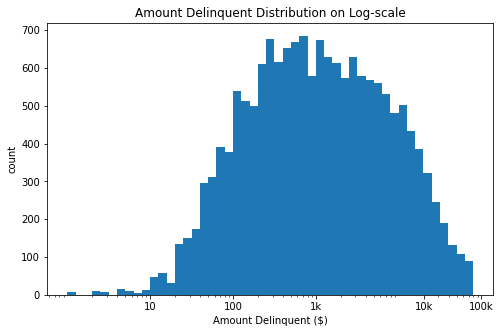

In [84]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_loan, x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

**Insight**
- Its now very obvious that most of the amount delinquency is within 100 to 1k and its normally distributed.

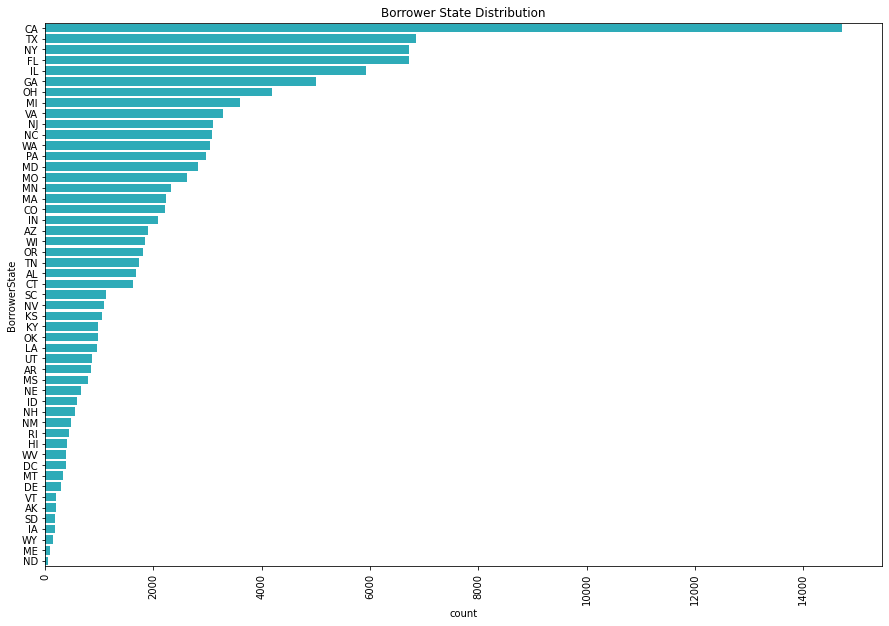

In [86]:
#BorrowerState Distrobution
ordered_cat = new_loan['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=new_loan,y='BorrowerState',color=base_color, order=ordered_cat);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

**Insight**
- California, Texas and New York has the three biggest amount of loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

On LoanORiginalAmount distribution which is is numeric variable, i performed a log scale to better understand and interprete my analysis although the first plot was right skewed, i also performed the log transformation to the following variables
- StatedMonthly income
- AmountDeliquent.
Carlifona has the highest number of loans, the loan terms of this dataset is mostly within 36months and one thing that really picked my interst was that people who borrowed the most were either employed or full time and just like i said could this be a factor of a higher standard of living knowing that you always receive salary, but that would be an analysis done on a different dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Some features actually had long scale and skewed distributions, and i had to check them on a log scale to see the hidden distribution and proffer my insight.
i also had similar occurence with the AmountDeliquent and StatedMOnthlyIncome haveing its values distributed on a large scaled which prompted the log transformation.
Lastly the data wasnt so bad i just dropped some null values and began my investigation although i had to copy the data and continue my analysis just as David said previously its a good practice.

## Bivariate Exploration

> in other to investigate relationships i would categorize my data variables into various sections namely:
- Numeric or Quantitative
- Categorical or Qualitative
>this is because Bivariate exploration deals with these two variuable types.

### Using the same variable ``new_loan``

In [16]:
# Checking my dataset
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       113937 non-null  int64         
 1   ListingCreationDate        113937 non-null  datetime64[ns]
 2   ClosedDate                 55089 non-null   datetime64[ns]
 3   BorrowerAPR                113912 non-null  float64       
 4   BorrowerRate               113937 non-null  float64       
 5   LenderYield                113937 non-null  float64       
 6   ProsperRating (Alpha)      84853 non-null   object        
 7   ProsperScore               84853 non-null   float64       
 8   IncomeRange                113937 non-null  object        
 9   ListingCategory (numeric)  113937 non-null  int64         
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  object  

In [13]:
# Selecting the varibles for both Qualitative and Quantitative data types

numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore','StatedMonthlyIncome', 'MonthlyLoanPayment',
                     'Investors','AmountDelinquent','LoanCurrentDaysDelinquent','LoanOriginalAmount','LP_ServiceFees']

categorical_variables = ['ProsperRating (Alpha)','IncomeRange', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'LoanStatus']

In [52]:
# trying to identify suitable colors for my analysis.
sb.color_palette()
sb.color_palette('Set2')
sb.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

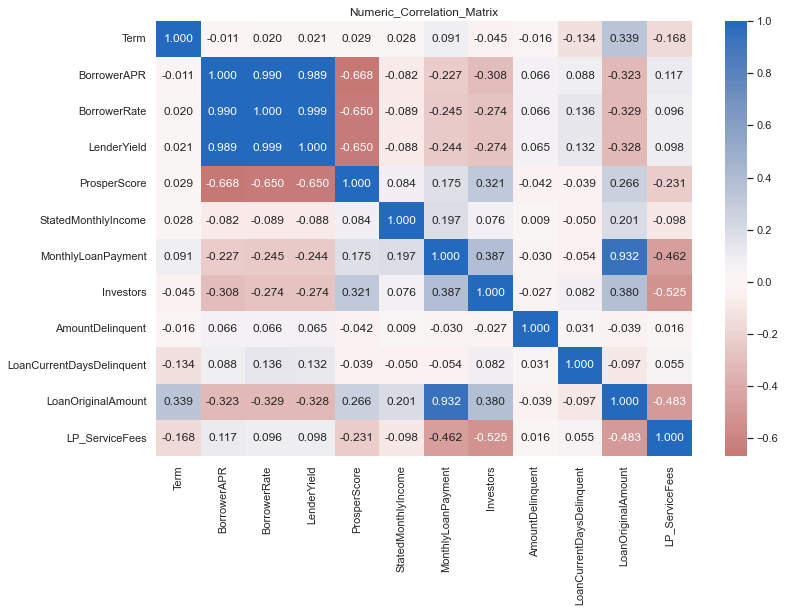

In [53]:
# Creating a correlation matrix for all numeric variables.
plt.figure(figsize = [12, 8])
sb.heatmap(new_loan[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Numeric_Correlation_Matrix') 
plt.show()

Ok i have always wanted to plot this particular matrix plot, especially because i tried it on the flight dataset which had so much data my local machine couldnt handle.

**Insight**
- one interesting thing to note is aside being in a positive relationship with each other``(the columns)``, there is acutally a positive relationship between the columns like **LoanOriginationAmount and MonthlyLoanPayment, and also BorrowerApr and BorrowerRate amongst others**


C:\Users\DELL\anaconda3\envs\alfred_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\alfred_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\alfred_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<Figure size 720x720 with 0 Axes>

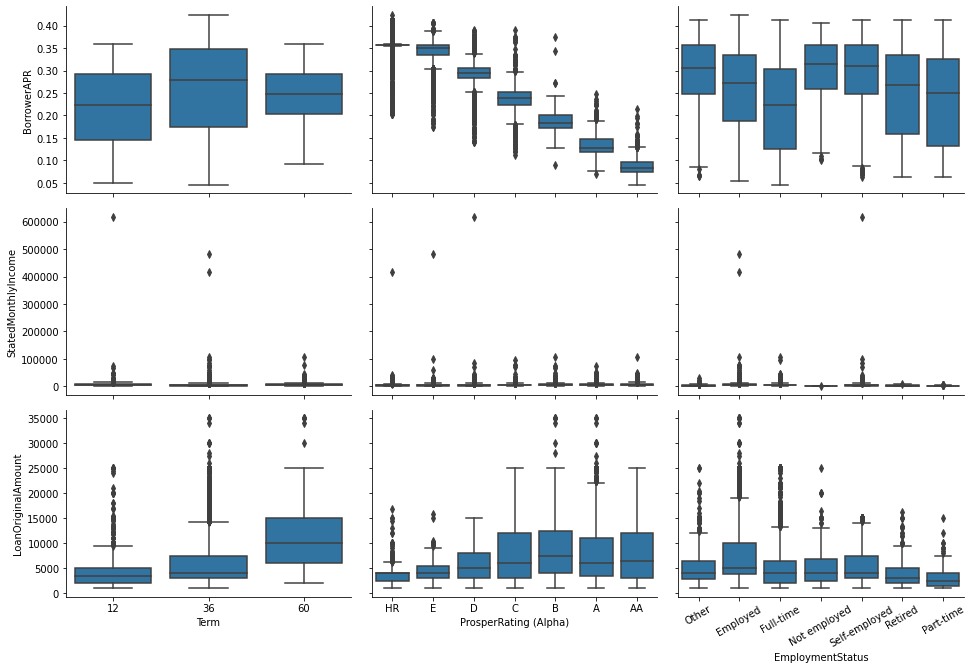

In [111]:

qunt_dtypes = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
qlt_dtypes = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = new_loan, y_vars= ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = qlt_dtypes, height = 3, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=30);

**Insight**
- The plot above shows the BorrowerApr decreases with the rating and that the loan amount has an increase with the loarn term, Borrowers who have the best rating (AA) also have the lowest BorrowerAPr which is intiutively relatable, i mean if you are known to pay on time you will obviously be rated highly, this means that the ProsperRating also has a strong effect on BorrowerApr.

Limitation is the statedmonthly income which its plot is not understandable as the plot is seen to have its values unpresentable.

In [94]:
# Plot matrix, since we will plot the matrix rather than plotting scatter plots one by one

new_loan_stats = ['Term', 'BorrowerAPR', 'BorrowerRate','ProsperScore','StatedMonthlyIncome','MonthlyLoanPayment','AmountDelinquent','LoanOriginalAmount']


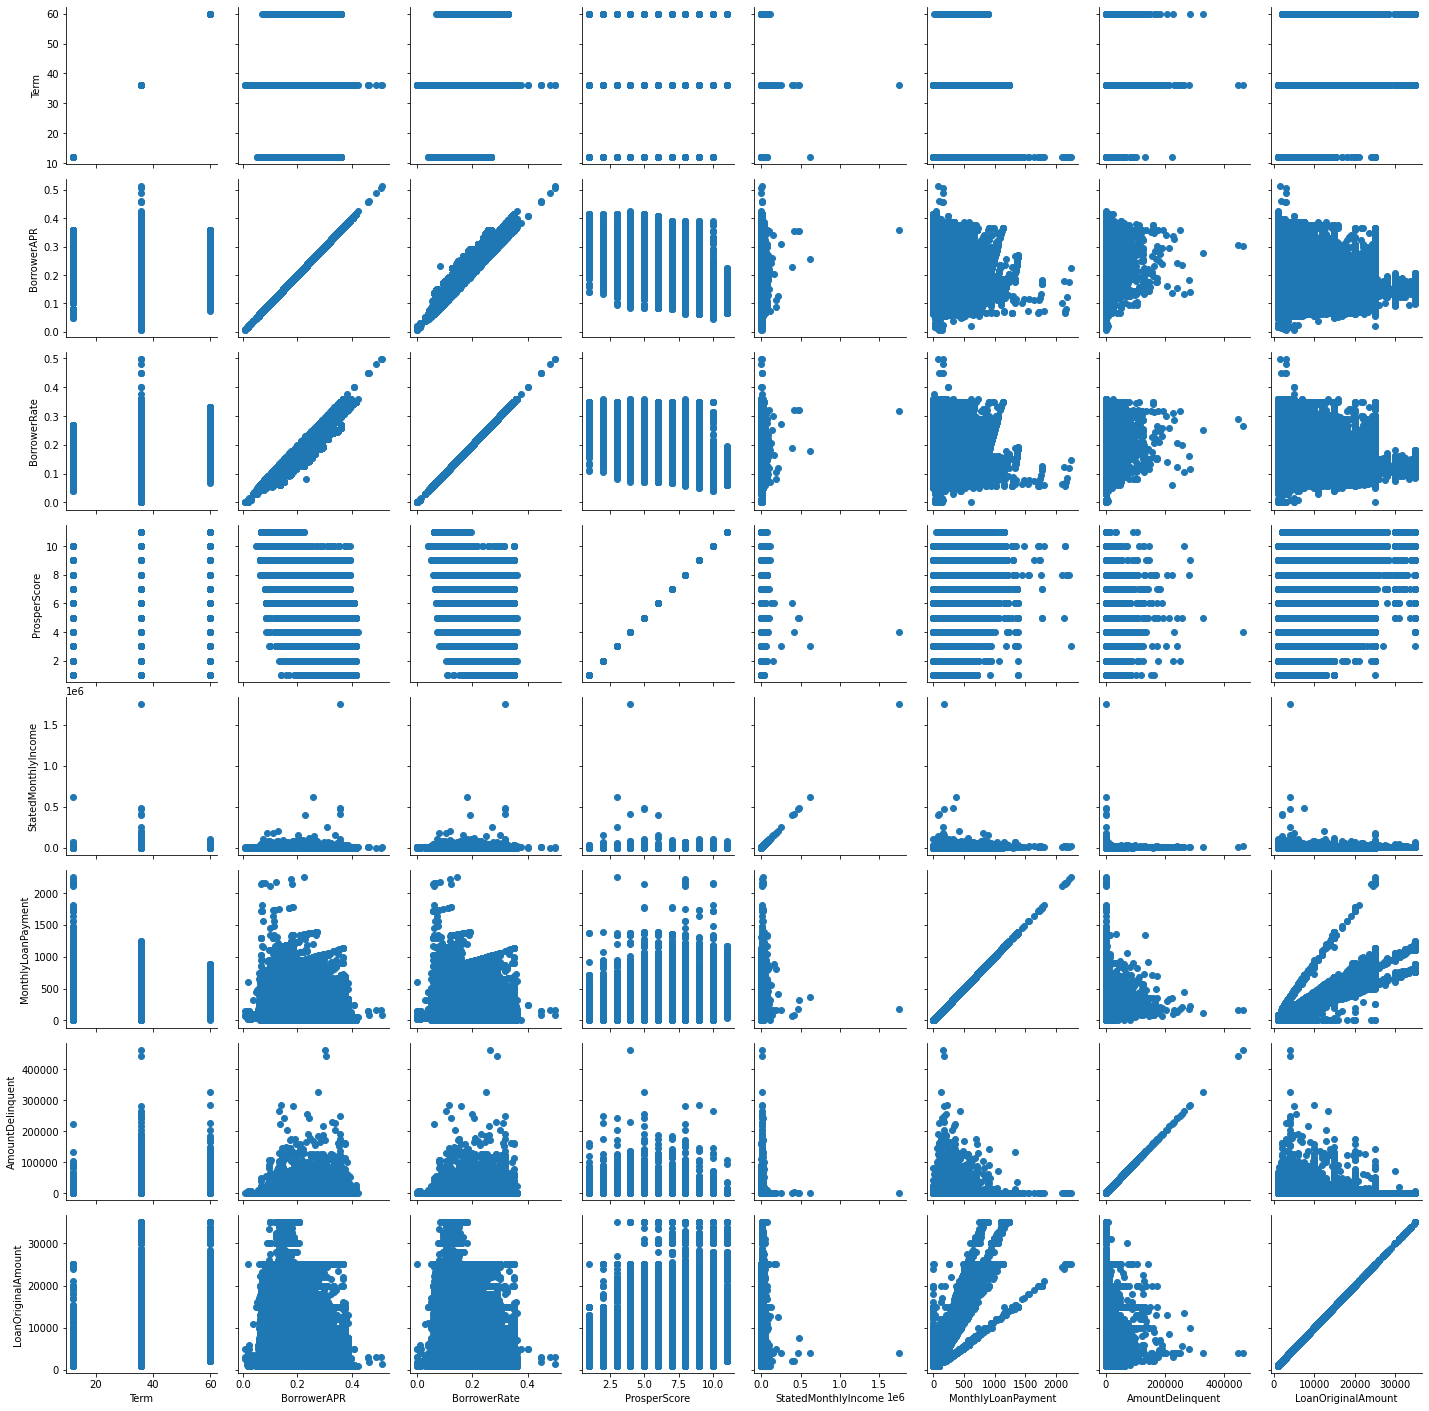

In [96]:
g= sb.PairGrid(data = new_loan, vars =new_loan_stats);
g.map(plt.scatter)

I think i will plot this a second time because i cant really tell if i can rely on just this plot

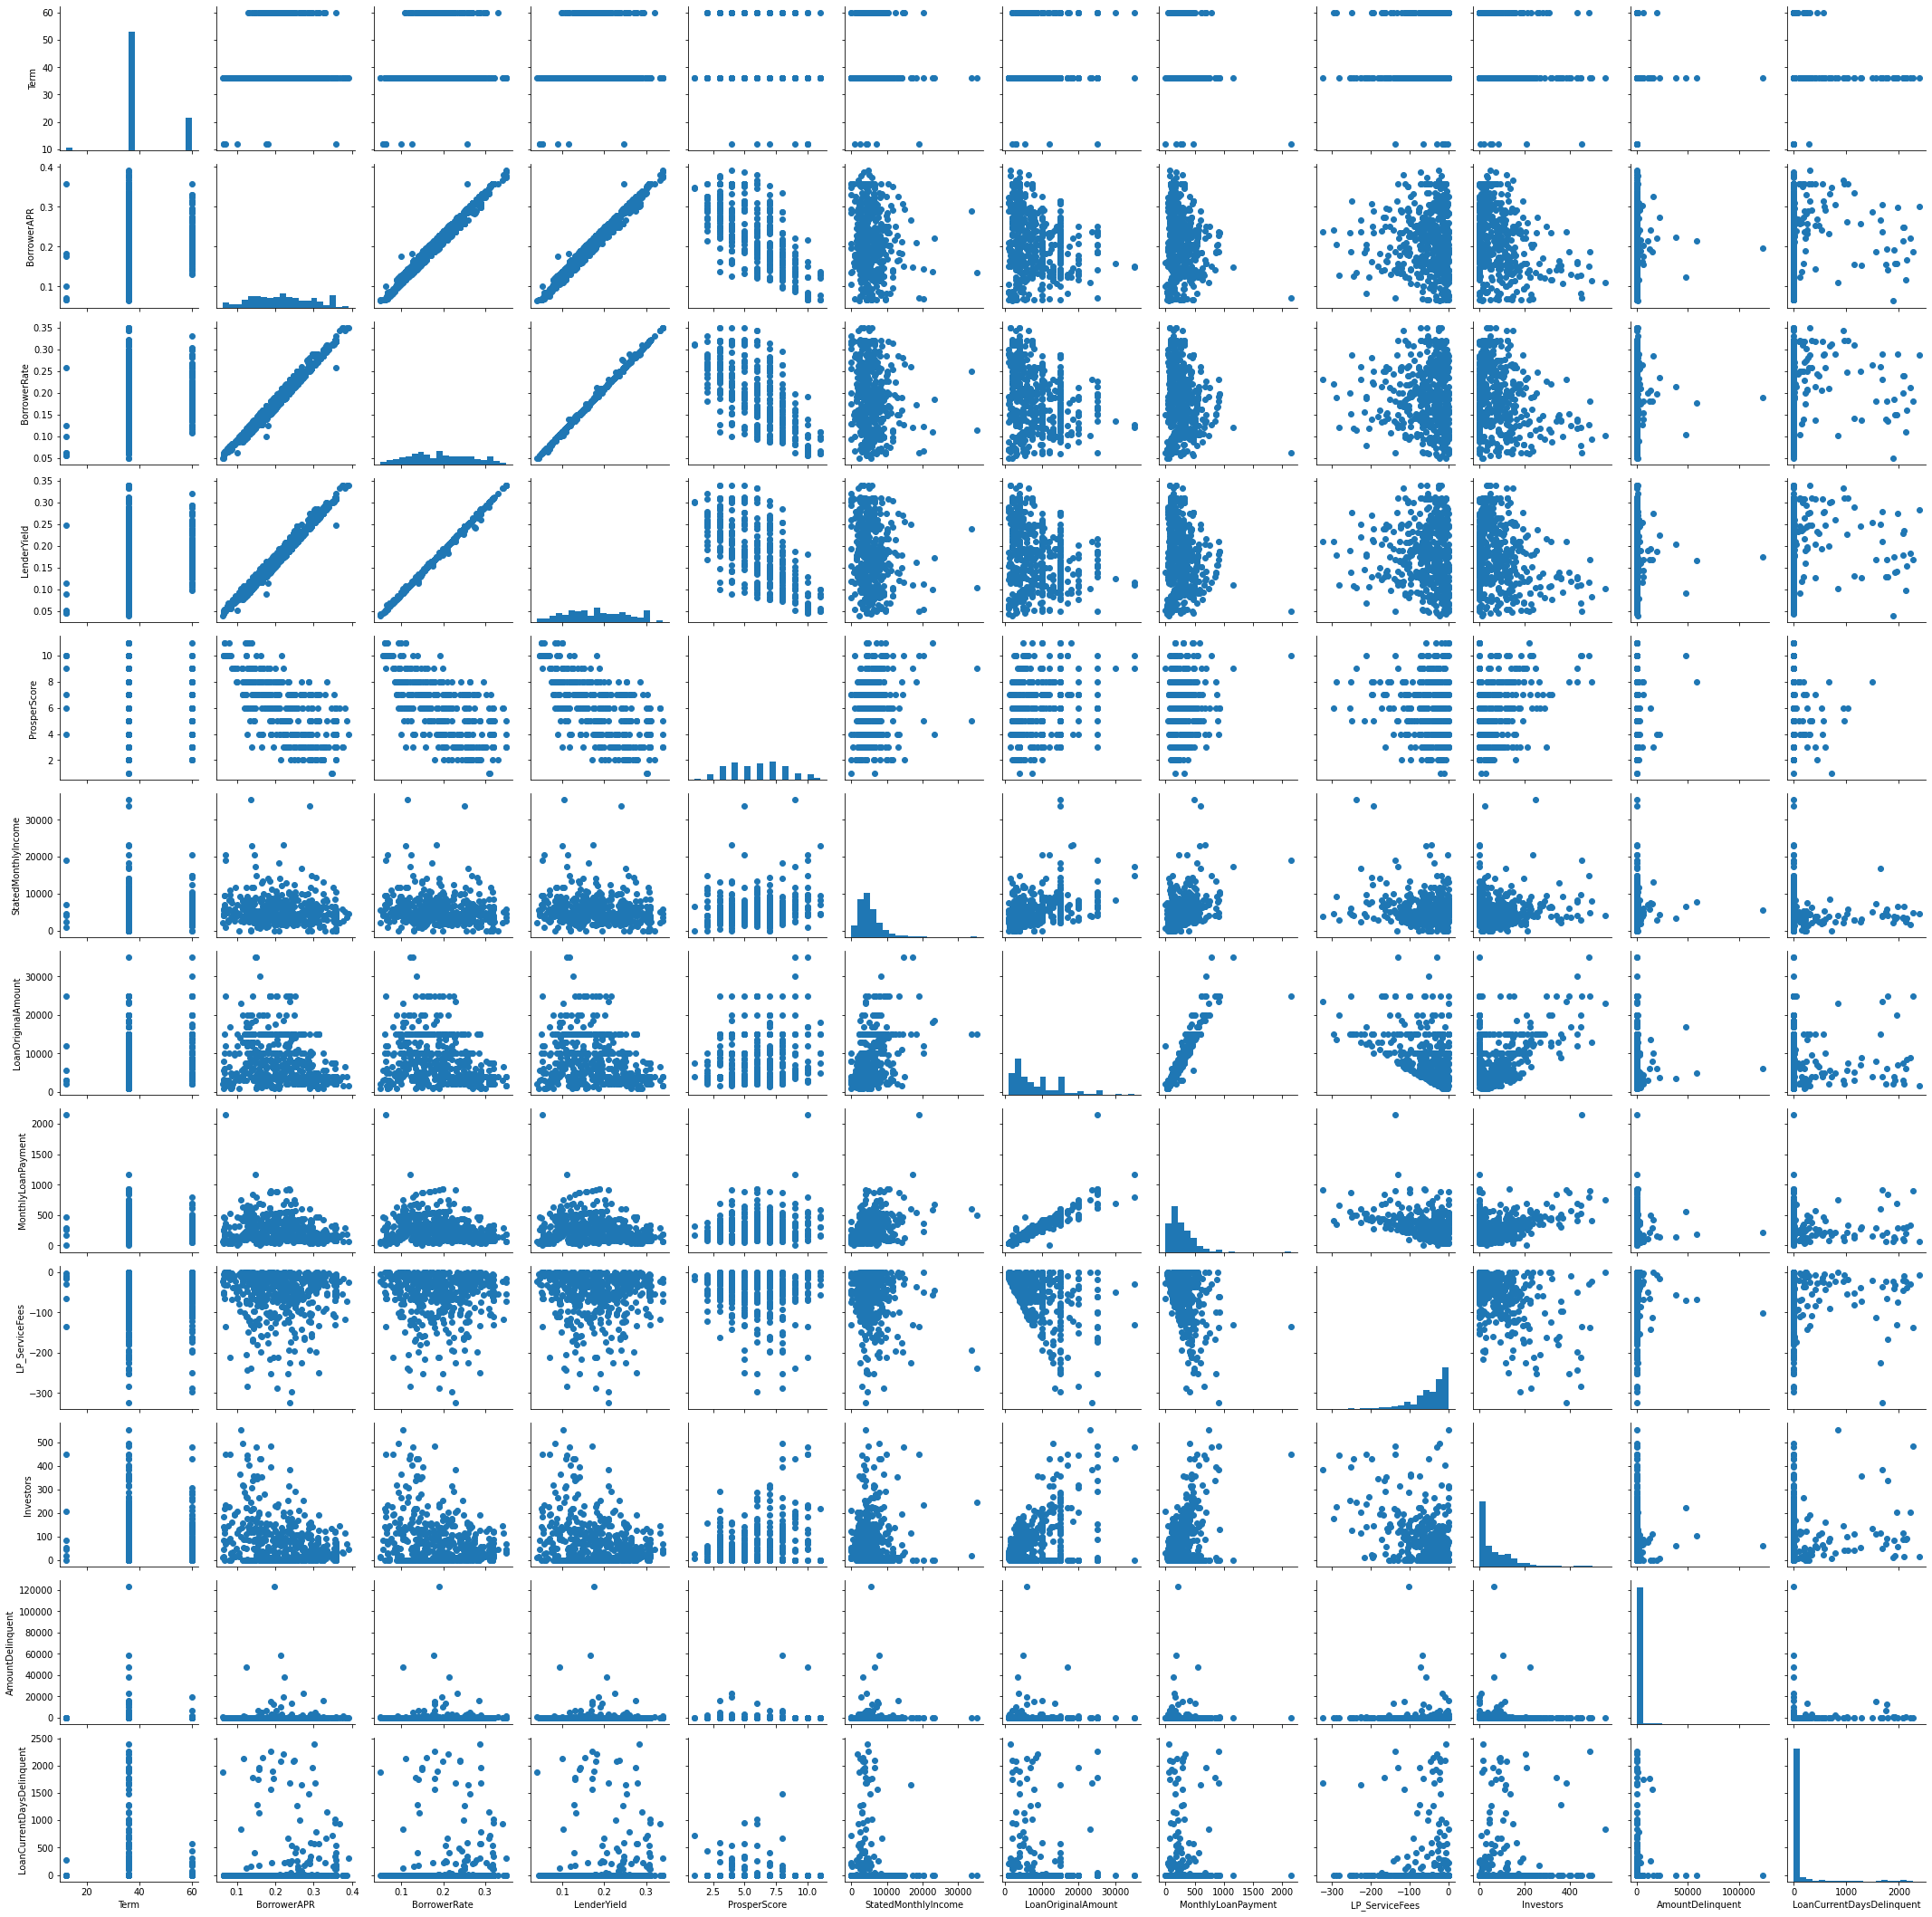

In [23]:
# Plotting the matric with a sample of 500 loans, this is because anything more than that might be to complex for me 
# to visualize and will disturb my local machines processing speed

samples = np.random.choice(new_loan.shape[0], 500, replace = False)
new_loan_samp = new_loan.loc[samples,:]

g = sb.PairGrid(data = new_loan_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20);


g.map_offdiag(plt.scatter);

**Insight**
- There is a positive relationship between LenderYeild and BorrowerApr also BorrowerRAte. ProsperRAting and ProsperScore also have a positive relationship, this doesnt come as a surprise to me because during the other plots these two variables played a significant rule in letting me know why loans were given to certain persons.
- There also is a negative relationship between ProsperScore and BorrowerApr, and Lender Yeild.
*sidenote* A little limitation here with studying the variables for insight as the image is too large.*

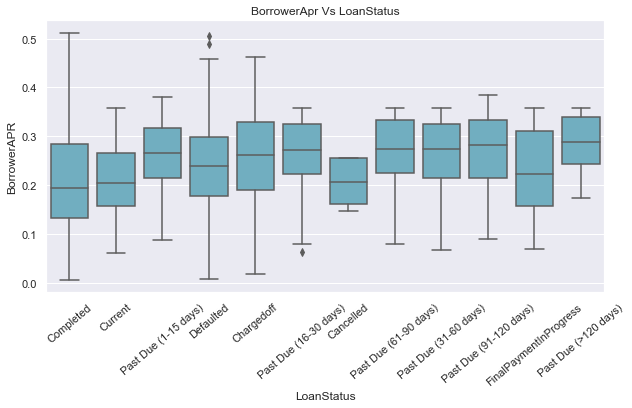

In [65]:
# plot against BorrowerApr and Loan Status

color = sb.color_palette()[9]
plt.figure(figsize = (10,5))
sb.boxplot(x ='LoanStatus', y= 'BorrowerAPR',  data = new_loan, color = color);
plt.title('BorrowerApr Vs LoanStatus')
plt.xticks(rotation = 40);

**Insight**
- From the plot above the current and completed loans have lower rate and mean than the Past_due loans except for the Past-due (16-30days) cancelled, Although at that point the difference is very little.


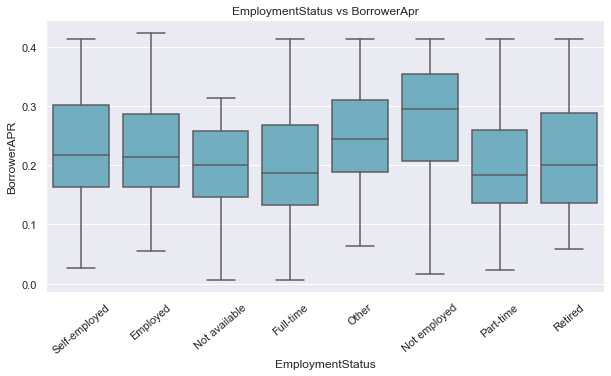

In [66]:
# plot against EmploymentStatus and BorrowerApr

color = sb.color_palette()[9]
plt.figure(figsize = (10,5))
sb.boxplot(x ='EmploymentStatus', y= 'BorrowerAPR',  data = new_loan, color = color);
plt.title('EmploymentStatus vs BorrowerApr')
plt.xticks(rotation = 40);

**insight**
- From box plot above i have noticed that people who are employed have a lower Inter Quantile Range(IQR) than people who are unemployed, although the unemployed persons seem to have the highest inter quartile range in the dataset.


In [120]:
new_loan['ListingCategory (numeric)'].value_counts().index[14]

10

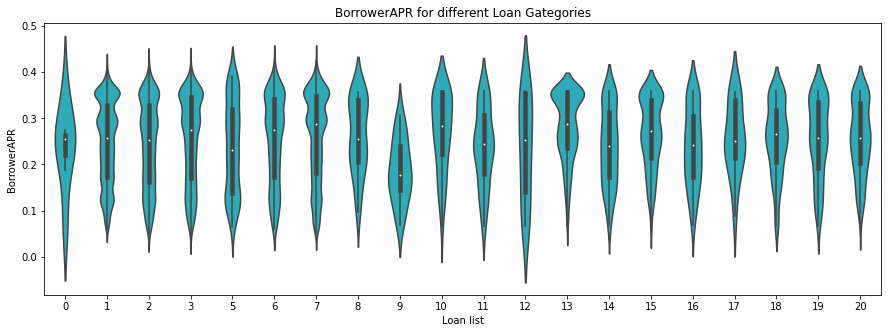

In [113]:
# Lets try to understand what is going on in the variables BorrowerApr and the listingCategory 
plt.figure(figsize = [15, 5])
sb.violinplot(data=new_loan,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('BorrowerAPR for different Loan Gategories')
plt.xlabel('Loan list');
plt.ylabel('BorrowerAPR');

**Insight**
- Ok so the listingCategoryNumeric is categorized with numbers, according to the [google sheets](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) it is the category of the listing that borrowers selected when posting their listing, but from the above plot we can see that the Cosmetic procedure which is ``Number 10`` has the highest interest rates and its data is well distributed.

In [159]:
fav_color= sb.color_palette()[0]

In [160]:
# Defining a funtion to be able to plot a violinplot to understand the relationship between variables and look at the distribution of data
def func_violin(new_loan, var1 , var2 ):
    " this is how to plot a function that will help you reduce the no of times you write code"
    sb.violinplot(data = new_loan, x =var1, y =  var2, color = fav_color )
    plt.xticks(rotation = 90)

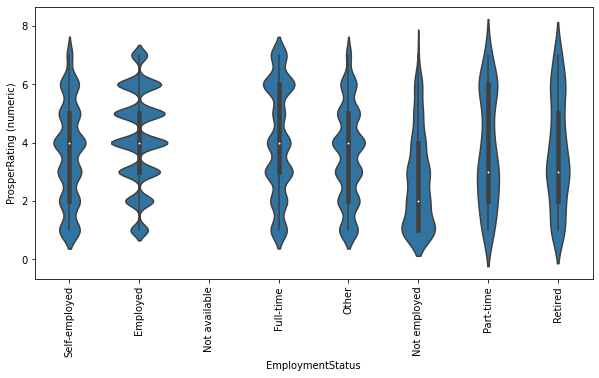

In [176]:
plt.figure(figsize=[10,5])
func_violin(new_loan, 'EmploymentStatus','ProsperRating (numeric)' )

**Insight**
- the Violinplot shows the relationship of EmploymentStatus to PropserRating (numeric), the box plot element shows the median employmentstatus (not employed) to be lesser than other status, None of the status or rating is concerntated at the median and this distribution is sparse

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

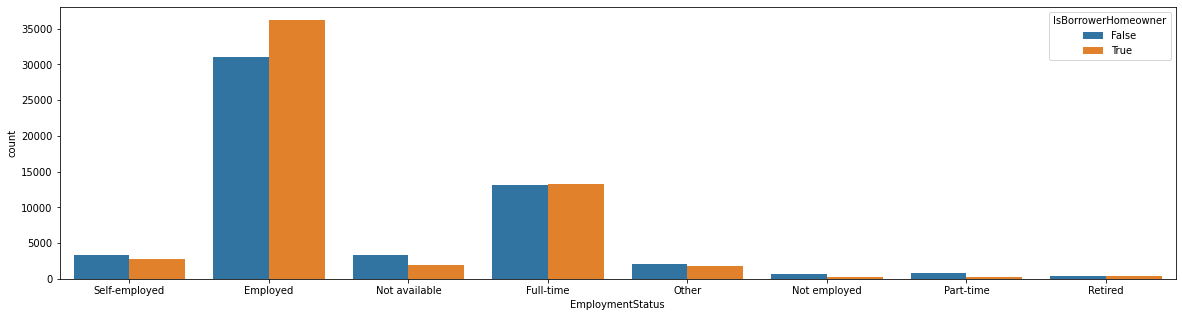

In [172]:
# lets see how many people own houses in this dataset
plt.figure(figsize=[20,5])
sb.countplot (data = new_loan, x = "EmploymentStatus" , hue ="IsBorrowerHomeowner")

**Insight**
- i think this should have been thought of even without the plot, the majority of the employed people have houses but people who fall under the category of full time have number equal amount of persons who have house and dont have as well, although i expected employed persons to have houses cause most times they take loan for mortgage but at the end numbers dont lie.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between the EmploymentStatus and BorrowerAPr show that people who unemployed recieve high interest rate compared to the employed which i said would be because it will be easier to think that employed persons will pay up better than those for are unemployed, the higher the income of the person the lower the interest rate.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>> The ListingCategory also a relationship with the BorrowerAPR as we are able to the rates for various persons whose categories are associated with the number used in the ListingCategory.
> The loan status for the past dues have a high interest rate and the number of Defaulted loans for Self-employed people are larger than those for Not Employed


## Multivariate Exploration

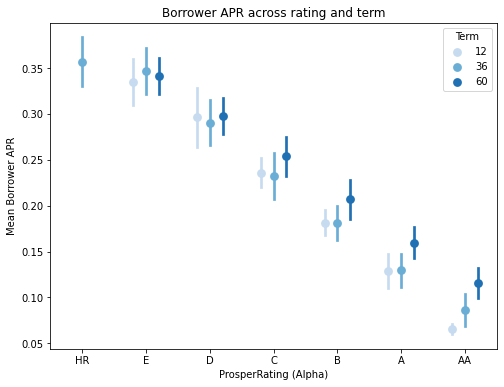

In [145]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = new_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

This is going to be almost the same thing as what i have intended to do next

**Insight**
- there is a fluctuation going on here, So for people who fall under the ``E`` rating the BorrowerApr reduced at 12Months Term and increased at 36 and decreased at 60, but for the range of D-C we can notice a decrease with increase in Term, and from B-AA there is an increase in the Apr with Term.

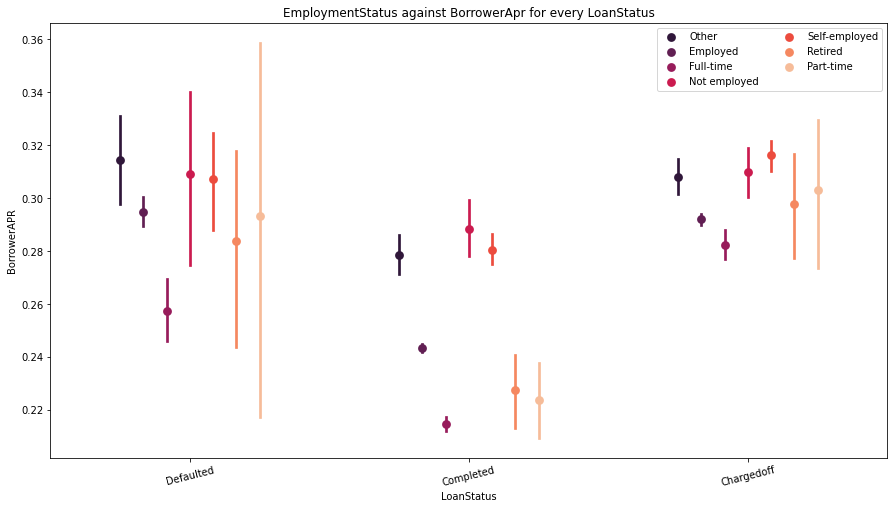

In [143]:
# Plotting EmploymentStatus against BorrowerApr for every LoanStatus

plt.figure(figsize = [15,8])
ax = sb.pointplot(x= 'LoanStatus', y= 'BorrowerAPR', hue = 'EmploymentStatus', data = new_loan, linestyles = '', dodge = 0.5,
                  palette ='rocket' )
plt.title('EmploymentStatus against BorrowerApr for every LoanStatus')
plt.ylabel('BorrowerAPR')
plt.legend(ncol=2)
plt.xticks(rotation = 14);


**Insight**
- Here we see that the past due loans has higher interest rate for employment status.

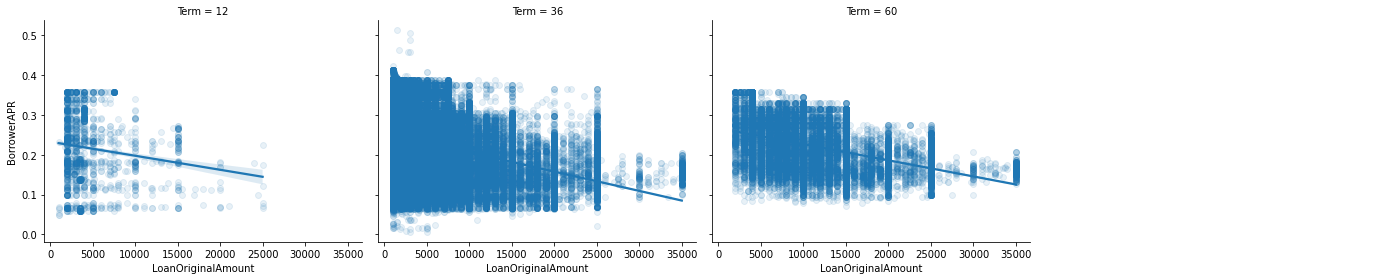

In [182]:
# The effect of Term on BorrowerApr and Loan amount
g=sb.FacetGrid(data=new_loan, aspect=1.2, height=4, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.03, scatter_kws={'alpha':0.1});
g.add_legend();

**Insight**
- It is interesting to note that Term does not have a significant effect on the relationship of BorrowerApr and LoanAmount

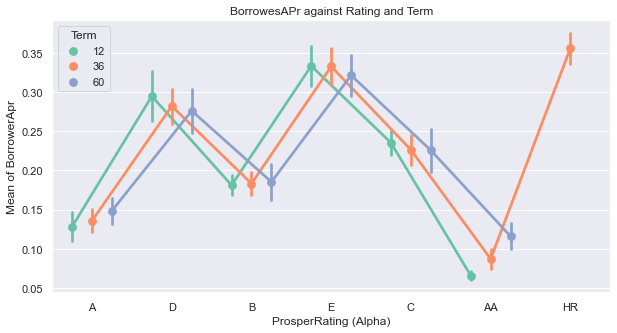

In [41]:
# Plotting BorrowersAprs against Rating Term
plt.figure(figsize=[10,5])
sb.set_theme(style="darkgrid")

sb.pointplot(x ='ProsperRating (Alpha)', y ='BorrowerAPR', hue = 'Term', data = new_loan, palette = 'Set2', linestyle ='', 
             dodge = 0.5, ci ='sd')
plt.title('BorrowesAPr against Rating and Term')
plt.ylabel('Mean of BorrowerApr');

**Insight**
- People with B and AA clearly seem to have an increased rate with a longer term, on the other hand People with D tend to have an increase in rate with shorter term, meanwhile people with A have a very slight increase in rate withb longer term, and there is just one peak with HR which i havent clearly understood yet.

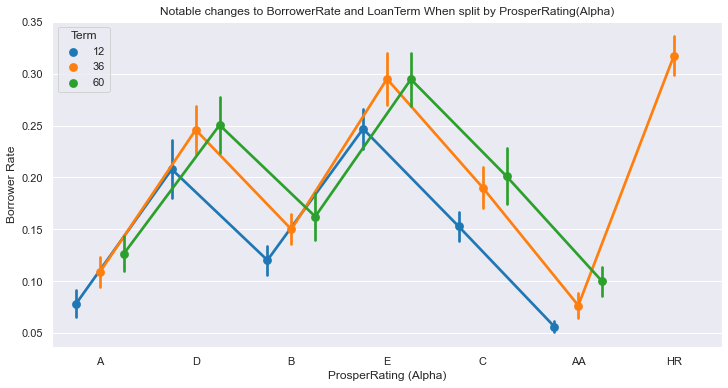

In [48]:
plt.figure(figsize=[12,6])

sb.pointplot(x ='ProsperRating (Alpha)', y ='BorrowerRate', hue = 'Term', data = new_loan, palette = 'tab10', linestyle ='', 
             dodge = 0.5, ci ='sd')
plt.title('Notable changes to BorrowerRate and LoanTerm When split by ProsperRating(Alpha)')
plt.ylabel('Borrower Rate');

> Hmm so before i draw up the insight i would like to address certain changes here, usually short term loans would have higher   rate and this goes for even creating an amortization table as well because with long rate the interest is compounded which in   turn leads to a huge amount exponentially but wouldnt necessarily hurt so much to most people since its a very long time to     pay up, there is usally small range of values spanned over a long time, that is when the loan term is long. but in this case   i am seeing a lower rate for the short Term.

**Insight**
- For Every category of ProsperRating(ALpha) ``A, D, B, E, C, AA, HR``, the BorrowerRAte increases, this now leads to my point above although i didnt notice this in the bivariate analysis.

In [68]:
new_loan.EmploymentStatus.value_counts()
new_loan.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

<Figure size 1440x360 with 0 Axes>

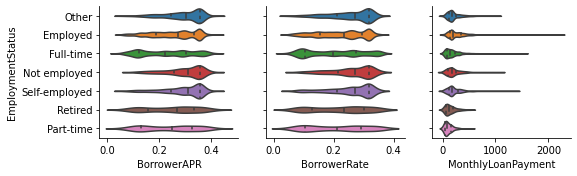

In [155]:
plt.figure(figsize=[20,5])
g = sb.PairGrid(data = new_loan, x_vars =['BorrowerAPR', 'BorrowerRate','MonthlyLoanPayment'],
                y_vars = ['EmploymentStatus'])
g.map(sb.violinplot, inner = 'quartile');

**Insight**
- Here the kernel bandwith has been reduced to generate lumpier plots whic identified minor clusters in the dataset such as the tail of the BorrowerAPr and Borrower RAte.

Like horizontal bar charts, horizontal violin plots are ideal for dealing with many categories. Swapping axes gives the category labels more room to breathe.


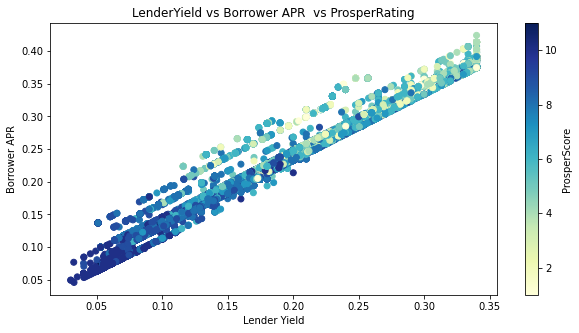

In [150]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=new_loan,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'YlGnBu')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

**Insight**
 - Here it is very clear that the plot depicts a positive relationship between the 2 variables ``BorrowerApr and LenderYield``, this correlation shows that when the borrowers of the loan pays, the lenderyield increases but the higher the prosper score the lower the borrowerapr and lenderyield.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My exploration led me to to understand that BorrowerApr and LenderYield both have a positive relationship and influence the prosperscore, they strengthened each other in the sense that when borrowers pay up it increase their prosper score, it quite interesting because an ordinary example will be that if i was to borrower someone money and got paid back without hestitation it would definitely build trust, now put that in the place of the prosperscore and it all sums up.



### Were there any interesting or surprising interactions between features

> An interesting interaction to note is the fluctuation between the BorrowerAPr decrease  with the BorrowerTerm for people with ``E`` rating but for people with D-c there seemed to be a decrease with increase in Term and for people with B-AA there was an increase in the Apr with Term.

## Conclusions
>This is by a long shot the best task I assume I have dealt with, I have been generating plots yet haven't perceived the profundity of investigation as of recently, there is this feeling of understanding that accompanies recognizing factors and knowing what to plot and how to plot them into the classes of Univariate, Bivariate and Multivariate and these are the means taking to go through the investigation, you should initially distinguish the factors, then comprehend the significance to the dataset which I did by utilizing the google sheet and researching about the ProsperLoan, what they do and how they order each piece of information, afterwords comprehending what plot is essential as I referenced before and afterward take a gander at your plot to comprehend what is going on with the numbers.

>My limit generally remains in regards to deficient power supply and a touch of delaying as I would have wrapped up some time back, I recently continued to search for new plots to take a stab at and I likewise realized that there is more work to be finished in the future in light of the fact that to me it appears to be the more I learn the more I figure out that I was ignorant earlier on.

>To end this in outline I would recognize to recognize my guide **MR ROTIMI KOLAWOLE** who is a phenomenal coach, his assistance with explaining subtleties and separating them into little crumps enables me to gain confidence in drawing up my insights.